In [ ]:
from google.colab import drive
# Mount Google Drive (follow the link and enter the authorization code)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Evaluation**

In [ ]:
pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import glob

def read_checkpoint_files(folder_path):
    # Pattern to match all checkpoint files
    file_pattern = os.path.join(folder_path, 'outputs_checkpoint_*.txt')
    # List of all matching files
    file_list = glob.glob(file_pattern)

    # Initialize an empty list to store DataFrame rows before concatenation
    rows = []

    # Read each file
    for file in file_list:
        with open(file, 'r') as f:
            for line in f:
                try:
                    # Parse the line
                    parts = line.split(', ')
                    target_text = parts[0].split('Target Text: ')[1]
                    filtered_text = parts[1].split('Filtered Text: ')[1]
                    generated_text = parts[2].split('Generated Text: ')[1].strip()

                    # Append to list as dictionary
                    rows.append({'Target Text': target_text,
                                 'Filtered Text': filtered_text,
                                 'Generated Text': generated_text})
                except IndexError:
                    # Handle lines that do not match the expected format
                    print(f"Skipping line due to unexpected format: {line}")

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(rows)
    return df



In [ ]:
def clean_text1(text):
    # Regular expression to keep Arabic letters, diacritics, and spaces, excluding common Arabic punctuation
    pattern = r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF\u064B-\u065F\u0670\u08D3-\u08E1\s]'
    arabic_punctuations = r'[،؛؟٪٫٬٭؉۔]'

    # Remove characters not matched by the pattern
    cleaned_text = re.sub(pattern, '', text)
    # Remove Arabic punctuations
    cleaned_text = re.sub(arabic_punctuations, '', cleaned_text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


def align_text(original_text, generated_text):
    aligned_original = []
    aligned_generated = []
    original_text = clean_text1(original_text)
    generated_text = clean_text1(generated_text)
    original_index = 0
    generated_index = 0
    count = 0
    while original_index < len(original_text) or generated_index < len(generated_text):
        original_text
        original_char = original_text[original_index] if original_index < len(original_text) else ''
        generated_char = generated_text[generated_index] if generated_index < len(generated_text) else ''

        if (original_char in "ًٌٍَُِّْ|" and generated_char in "ًٌٍَُِّْ|") or (original_char not in "ًٌٍَُِّْ|" and generated_char not in "ًٌٍَُِّْ|"):
            aligned_original.append(original_char)
            aligned_generated.append(generated_char)
            original_index += 1
            generated_index += 1
        elif original_char not in "ًٌٍَُِّْ|":
            aligned_original.append('|')
            aligned_generated.append(generated_char)
            generated_index += 1
        else:
            aligned_original.append(original_char)
            aligned_generated.append('|')
            original_index += 1
        if count == 5000:
          return "",""
        count += 1

    aligned_original_text = ''.join(aligned_original)
    aligned_generated_text = ''.join(aligned_generated)

    return aligned_original_text, aligned_generated_text


def align_df(df):
  for index in range(df.shape[0]):
      aligned_target_text, aligned_generated_text = align_text(df.loc[index,"Target Text"], df.loc[index,"Generated Text"])
      df.at[index, 'Aligned Target Text'] = aligned_target_text
      df.at[index, 'Aligned Generated Text'] = aligned_generated_text
  return df




In [ ]:
import re


def clean_text(text):
    # Regular expression to keep Arabic letters, diacritics, and spaces, excluding common Arabic punctuation
    pattern = r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF\u064B-\u065F\u0670\u08D3-\u08E1\s]'
    arabic_punctuations = r'[،؛؟٪٫٬٭؉۔]'

    # Remove characters not matched by the pattern
    cleaned_text = re.sub(pattern, '', text)
    # Remove Arabic punctuations
    cleaned_text = re.sub(arabic_punctuations, '', cleaned_text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


In [ ]:
def remove_non_diacritics(text):
    diacritic_characters = "ًٌٍَُِّْ |"
    result = [char for char in text if char in diacritic_characters]
    return ''.join(result)

# Example usage:
text = "الكِتاب جيِّدٌ جداً"
diacritic_text = remove_non_diacritics(text)
print(diacritic_text)

def filter_df (df):
  for index in range(df.shape[0]):
      filtered_target_text, filtered_generated_text = remove_non_diacritics(df.loc[index,"Aligned Target Text"]),(remove_non_diacritics(df.loc[index,"Aligned Generated Text"]))
      df.at[index, 'Filtered Target Text'] = filtered_target_text
      df.at[index, 'Filtered Generated Text'] = filtered_generated_text
  return df

ِ ٌِّ ً


In [ ]:
def remove_corresponding_indices(target_text, generated_text):
    # Initialize empty strings for the new output
    new_generated_text = ""
    new_target_text = ""

    # Initialize an index for iterating over the characters
    i = 0

    # Iterate over the characters in the generated text
    while i < len(generated_text) and i < len(target_text):
        # If either character is '|', increase the index and skip adding the characters
        if generated_text[i] == '|' or target_text[i] == '|':
            i += 1
            continue

        # Add characters to new strings if there's no '|' at the current index in either string
        new_generated_text += generated_text[i]
        new_target_text += target_text[i]
        i += 1

    return new_target_text,  new_generated_text

def remove_shadda(text):
    return re.sub(r'\u0651', '', text)

def remove_spaces(text):
    return re.sub(r'\s+', '', text)

def word_accuracy(reference, generated):
    reference_words = reference.split()
    generated_words = generated.split()

    correct_words = sum(1 for ref, gen in zip(reference_words, generated_words) if ref == gen)
    total_words = len(reference_words)

    if total_words > 0:
      accuracy = correct_words / total_words
    else:
      accuracy = 0
    #print(correct_words, total_words)
    return accuracy
def character_accuracy(reference, generated):
    correct_chars = sum(1 for ref, gen in zip(reference, generated) if ref == gen)
    total_chars = len(reference)
    if total_chars > 0:
      accuracy = correct_chars / total_chars
    else:
      accuracy =0
    return accuracy
import Levenshtein

def levenshtein_distance(reference, generated):
    distance = Levenshtein.distance(reference, generated)
    return distance

def diacritization_rate_eq(filtered, generated):
    return 1 - (len(remove_spaces(filtered)) - len(remove_spaces(remove_non_diacritics(remove_shadda(generated)))))/len(remove_spaces(filtered))

def word_diacritization_rate_eq(filtered, generated):
    return 1 - (len(filtered.split()) - len(remove_extra_spaces(remove_non_diacritics(generated)).split()))/len(filtered.split())

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def accuracy_measure(folderpath):
  df = read_checkpoint_files(folderpath)
  df = align_df(df)
  df = filter_df(df)
  target_diacritization_rate_sum = 0
  target_word_diacritization_rate_sum = 0
  for index in range(df.shape[0]):
      word_acc = word_accuracy(df.loc[index,"Filtered Target Text"], df.loc[index,"Filtered Generated Text"])
      diacritics_acc = character_accuracy(df.loc[index,"Filtered Target Text"], df.loc[index,"Filtered Generated Text"])
      levenshtein_dist = levenshtein_distance(df.loc[index,"Filtered Target Text"], df.loc[index,"Filtered Generated Text"])
      new_target, new_generated = remove_corresponding_indices(df.loc[index,"Filtered Target Text"], df.loc[index,"Filtered Generated Text"])
      matched_word_accuracy = word_accuracy(new_target, new_generated)
      matched_diacritization_accuracy = character_accuracy(new_target, new_generated)
      diacritization_rate = diacritization_rate_eq(df.loc[index,"Filtered Text"] , df.loc[index,"Generated Text"])
      word_diacritization_rate = word_diacritization_rate_eq(df.loc[index,"Filtered Text"] , df.loc[index,"Generated Text"])
      target_diacritization_rate_sum += diacritization_rate_eq(df.loc[index,"Filtered Text"] , df.loc[index,"Target Text"])
      target_word_diacritization_rate_sum += word_diacritization_rate_eq(df.loc[index,"Filtered Text"] , df.loc[index,"Target Text"])
      df.at[index, 'Diacritics Accuracy'] = diacritics_acc
      df.at[index, 'Matched Diacritization Accuracy'] = matched_diacritization_accuracy
      df.at[index, 'Diacritization Rate'] = diacritization_rate
      df.at[index, 'Word Accuracy'] = word_acc
      df.at[index, 'Matched Word Accuracy'] = matched_word_accuracy
      df.at[index, 'Word Diacritization Rate'] = word_diacritization_rate
      df.at[index, 'Levenshtein Distance'] = levenshtein_dist
      df.at[index, 'Sentence Length'] = len(remove_spaces(df.loc[index,"Filtered Text"]))
  if df.shape[0] > 0:
    print("target_diacritization_rate_sum = {}".format(target_diacritization_rate_sum/df.shape[0]))
    print("target_word_diacritization_rate_sum = {}".format(target_word_diacritization_rate_sum/df.shape[0]))
  return df




In [ ]:
x = "ذهب احمد الى"
y = "ذَهًبٌ اِحٍمْد اٍلّىُ"
diacritization_rate_eq(x,y)

0.8

In [ ]:
import pandas as pd
import glob

def create_dataframe_from_files(file_pattern):
    """
    Create a list of DataFrames from files matching the given pattern.

    Parameters:
        file_pattern (str): The pattern to match files (e.g., 'Bulktest*').

    Returns:
        list: A list of DataFrames where the index is the file name.
    """
    file_paths = glob.glob(file_pattern)
    dataframes = {}

    for file_path in file_paths:
        file_name = file_path.split('/')[-1]  # Extract file name from path
        df = accuracy_measure(file_path)  # Assuming CSV format, adjust if needed
        file_name = file_name.replace("BulkTest","")
        if "Alfarasa" in file_name or "Shakala" in file_name:
          file_name = file_name.replace("Alfarasa","Farasa")
          file_name = file_name.replace("Shakala","Shakkala")
          dataframes[file_name] = df
          continue
        if "SinglePrompt"  not in file_name:
          file_name = file_name + "3Chain"
        file_name = file_name.replace("GPT350125","GPT3.5-0125 ")
        file_name = file_name.replace("GPT35","GPT3.5 ")
        file_name = file_name.replace("GPT4","GPT4 ")
        file_name = file_name.replace("NoDictionary","")
        file_name = file_name.replace("Almaany","")
        file_name = file_name.replace("Prompt","")
        file_name = file_name.replace("Test","")
        file_name = file_name.replace("Single","")

        dataframes[file_name] = df

    return dataframes

# Example usage:
file_pattern = '/content/drive/MyDrive/BulkTest*'
dfs = create_dataframe_from_files(file_pattern)


target_diacritization_rate_sum = 0.7643121900641217
target_word_diacritization_rate_sum = 0.8045433106199024
Skipping line due to unexpected format: Target Text: 1038 - مَسْأَلَةٌ: وَحَمْدُ اللَّهِ تَعَالَى عِنْدَ الْفَرَاغِ مِنْ الأَكْلِ حَسَنٌ وَلَوْ بَعْدَ كُلِّ لُقْمَةٍ لأَنَّهُ فِعْلُ خَيْرٍ وَبِرٍّ, وَفِي كُلِّ حَالٍ., Filtered Text: 1038 - مسألة: وحمد الله تعالى عند الفراغ من الأكل حسن ولو بعد كل لقمة لأنه فعل خير وبر, وفي كل حال., Generated Text: 1038 - مَسْأَلَة وَحَمْدُ اللَّه تَعَالَى عِنْدَ الْفَرَاغِ مِن الأكل حَسَنَ وَلَوْ بعدَّ كُلَّ لقمةٍ لِأَنَّهُ فعلٌّ خَيْرٌ وَبِرٌّ وَفِي كُلَّ حالّ

target_diacritization_rate_sum = 0.7705884398911405
target_word_diacritization_rate_sum = 0.805191747935452
Skipping line due to unexpected format: Target Text: 1038 - مَسْأَلَةٌ: وَحَمْدُ اللَّهِ تَعَالَى عِنْدَ الْفَرَاغِ مِنْ الأَكْلِ حَسَنٌ وَلَوْ بَعْدَ كُلِّ لُقْمَةٍ لأَنَّهُ فِعْلُ خَيْرٍ وَبِرٍّ, وَفِي كُلِّ حَالٍ., Filtered Text: 1038 - مسألة: وحمد الله تعالى عند الفراغ من الأكل

In [ ]:
import pandas as pd

def compute_summary(dataframes):
    """
    Compute summary statistics for each DataFrame, ensuring each DataFrame has columns.

    Parameters:
        dataframes (dict): A dictionary of DataFrames.

    Returns:
        pandas.DataFrame: A DataFrame containing summary statistics.
    """
    summary = pd.DataFrame()

    for file_name, df in dataframes.items():
        # Check if DataFrame has at least one column
        if df.columns.size > 0:
            # Compute mean for numeric columns and count rows

            # Update lambda function for conditional formatting and rounding
            summary[file_name] = df.describe().loc['mean'].map(
                lambda x: '{:.2%}'.format(x) if x < 1 else round(x, 2))
            summary.loc['Rows', file_name] = len(df)  # Number of rows
        else:
            print(f"Skipping {file_name} as it has no columns.")

    return summary

# Example usage:
summary_df = compute_summary(dfs)

Skipping GPT3.5 DictionaryFinetunedDataset as it has no columns.


In [ ]:
summary_df#.loc[:,[col for col in summary_df if col.startswith('BulkTestGPT35')]]


,GPT4 Dictionary3Chain,GPT3.5-0125 Dictionary3Chain,GPT3.5 Dictionary3Chain,GPT3.5 3Chain,GPT4 3Chain,GPT3.5 DictionaryLong3Chain,GPT3.5 Dictionary,GPT3.5-0125 Finetuned,Farasa,GPT3.5-0125 FinetunedwithRepetition,Shakkala
Diacritics Accuracy,81.67%,67.10%,66.94%,62.20%,82.77%,68.34%,69.48%,92.61%,77.58%,92.58%,83.31%
Matched Diacritization Accuracy,91.34%,85.48%,85.38%,84.03%,91.10%,88.28%,85.08%,94.70%,89.70%,94.57%,84.26%
Diacritization Rate,68.14%,60.24%,60.65%,54.90%,69.21%,57.02%,62.95%,76.21%,65.30%,76.26%,72.75%
Word Accuracy,52.13%,34.92%,33.66%,30.02%,54.98%,34.58%,36.08%,81.41%,39.19%,81.02%,68.30%
Matched Word Accuracy,75.58%,57.09%,56.75%,53.36%,76.74%,66.41%,57.26%,83.52%,75.61%,83.04%,70.07%
Word Diacritization Rate,77.34%,74.04%,73.90%,64.38%,78.22%,70.60%,72.54%,79.78%,77.35%,79.72%,76.49%
Levenshtein Distance,29.44,65.27,67.34,70.19,28.94,60.69,53.91,13.19,32.92,12.84,20.27
Sentence Length,155.5,166.56,166.56,166.56,158.53,166.56,166.56,170.16,166.56,166.56,168.05
Rows,50,499,499,499,49,499,499,519,499,499,547


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


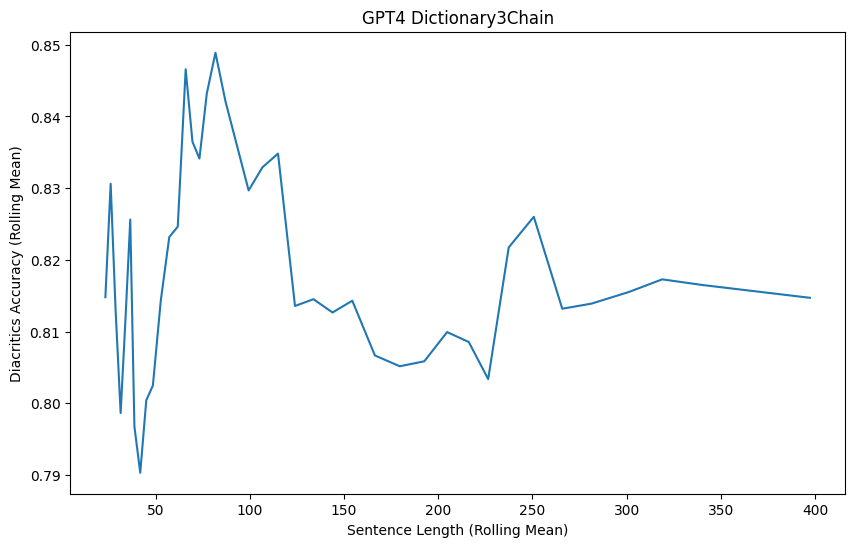

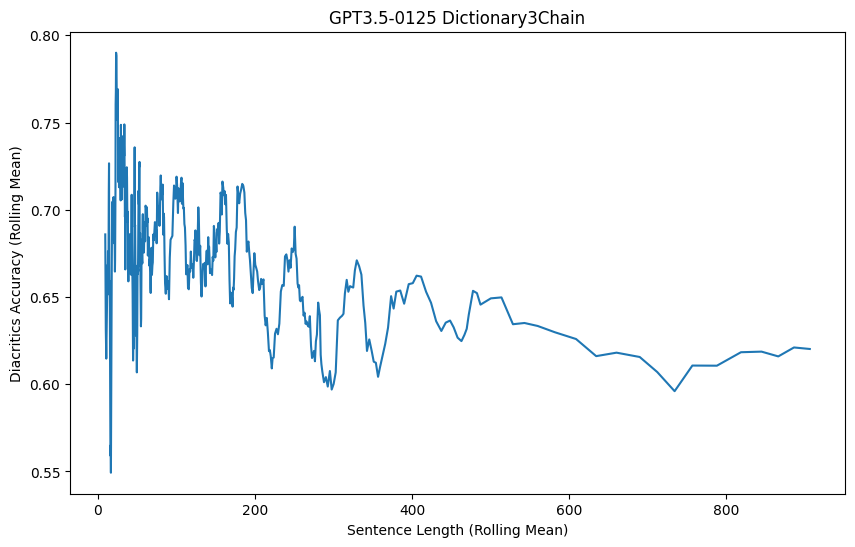

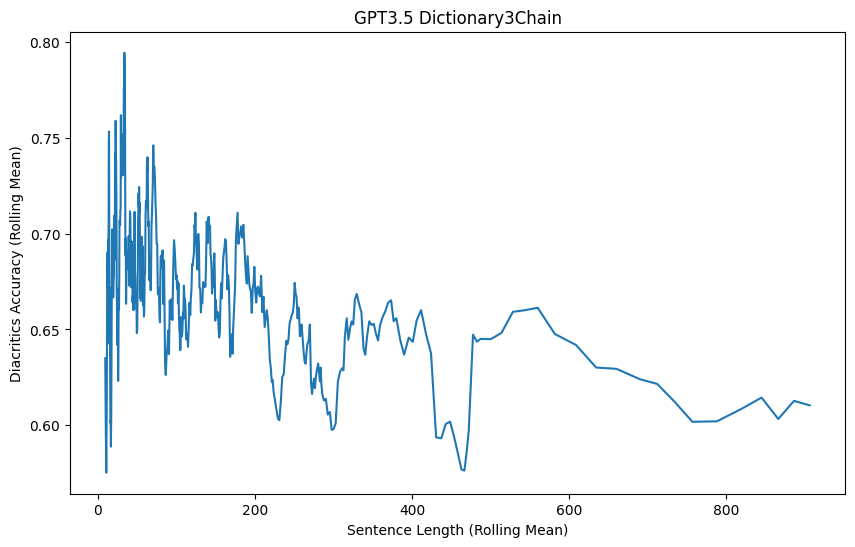

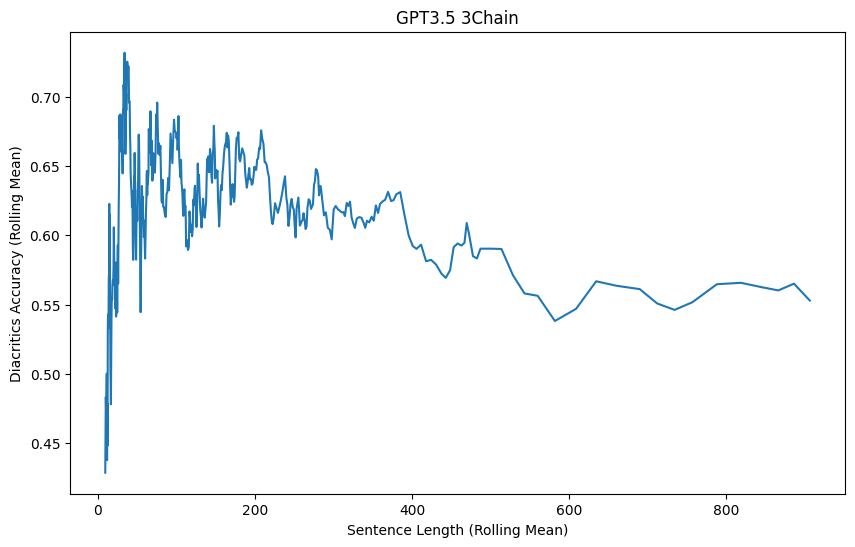

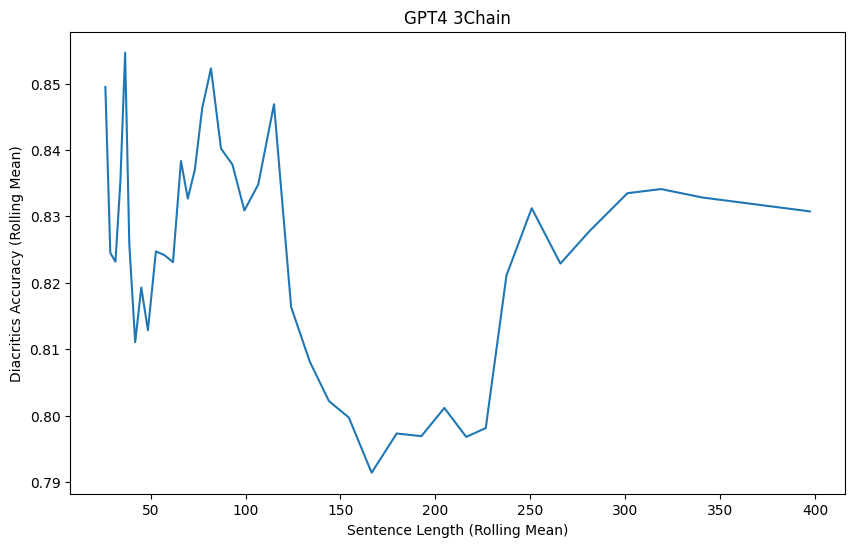

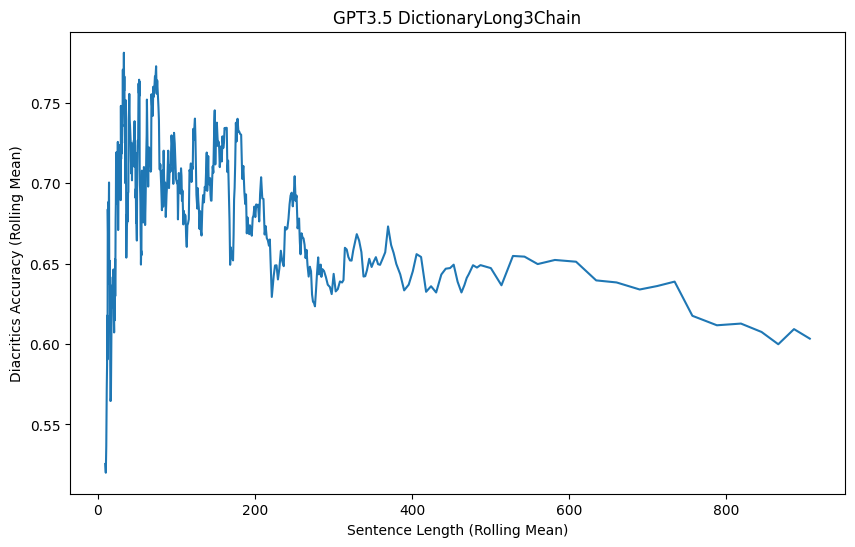

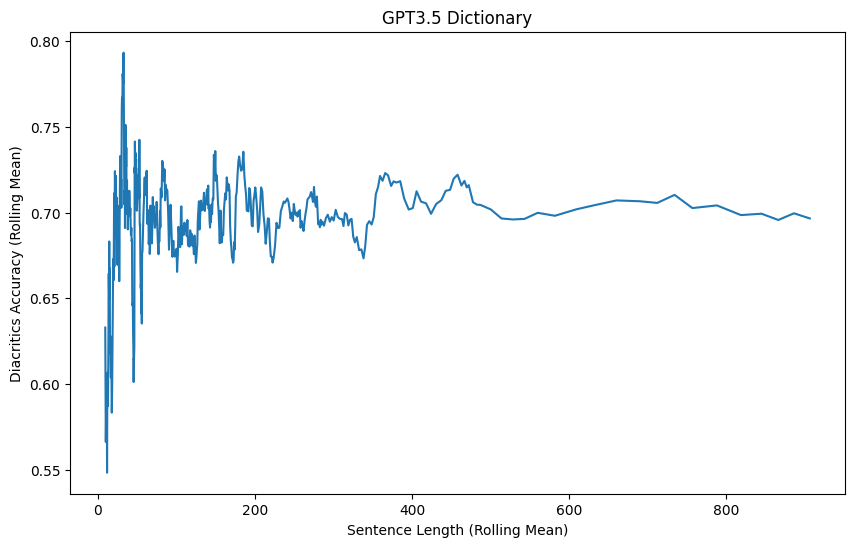

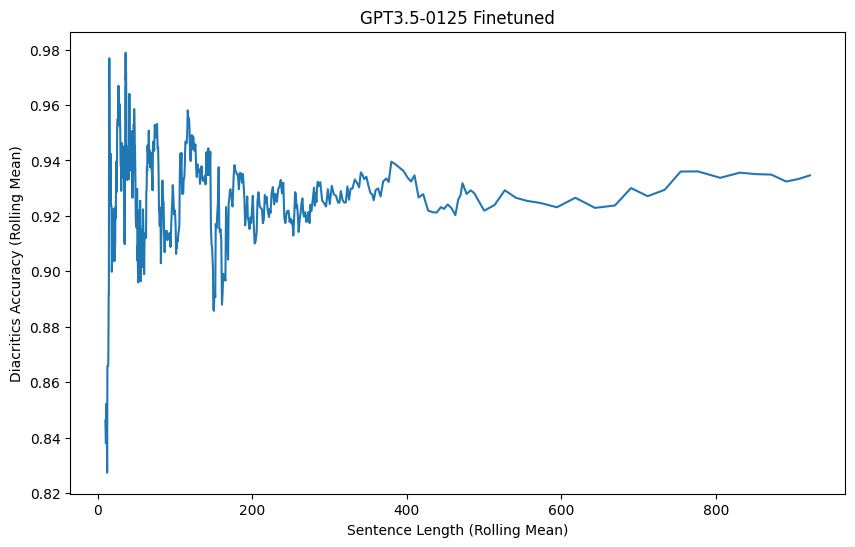

Skipping GPT3.5 DictionaryFinetunedDataset as it has no columns.


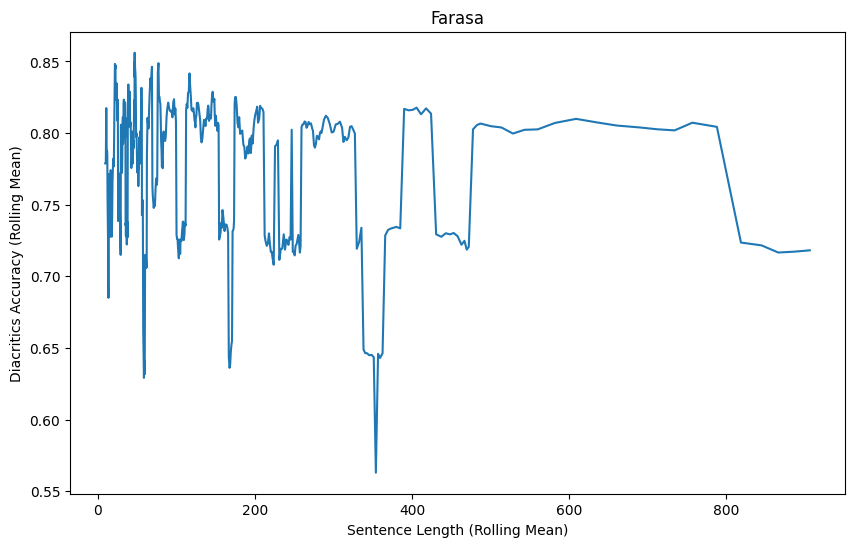

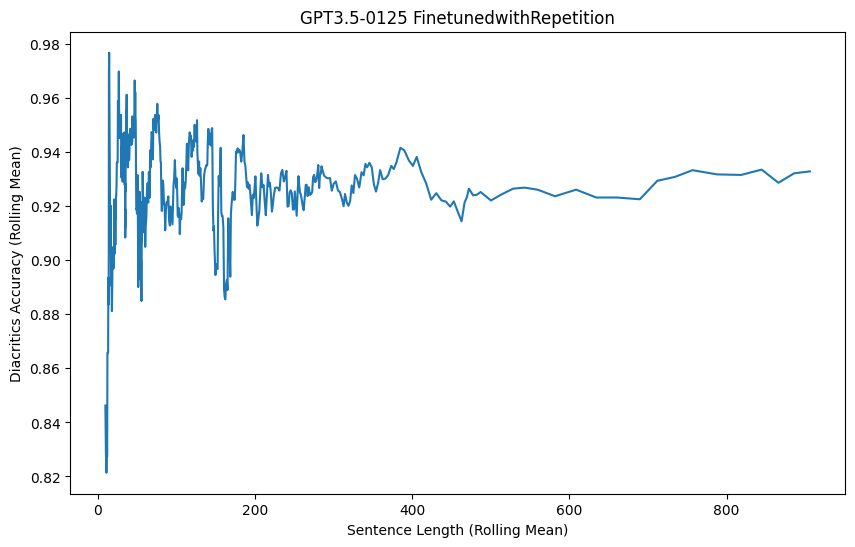

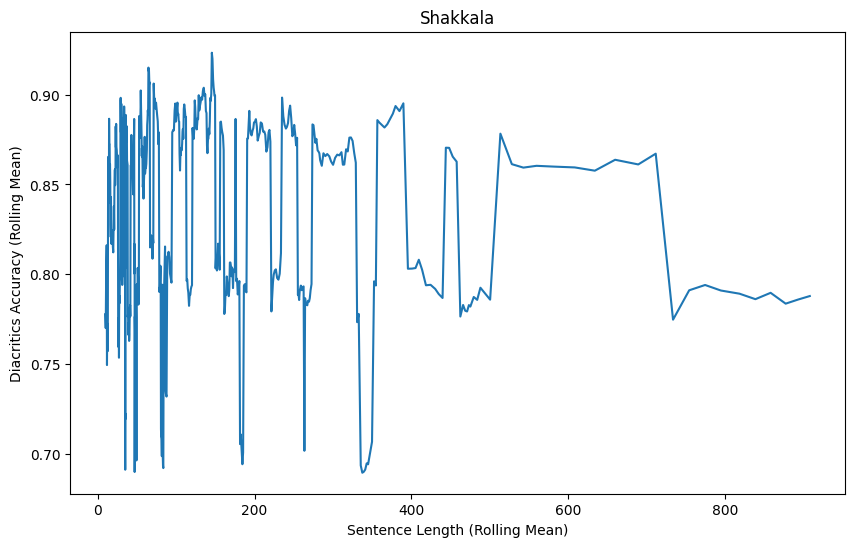

In [ ]:
import matplotlib.pyplot as plt

def makeplot(dataframes, test, window_size = 10, text_independent = "Sentence Length"):
    """
    Plot rolling scatter plots for each DataFrame, ensuring each DataFrame has columns.
    Specifically, it plots Diacritics Accuracy against Sentence Length with a rolling window.

    Parameters:
        dataframes (dict): A dictionary of DataFrames.
    """
    for file_name, df in dataframes.items():
        # Check if DataFrame has at least one column
        if df.columns.size > 0:
            # Ensure sorting by "Sentence Length"
            df_sorted = df.sort_values(text_independent)

            # Define window size for rolling operation

            # Calculate rolling averages
            rolling_sentence_length = df_sorted[text_independent].rolling(window=window_size).mean()
            rolling_diacritics_accuracy = df_sorted[test].rolling(window=window_size).mean()

            # Plotting
            plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
            plt.plot(rolling_sentence_length, rolling_diacritics_accuracy)
            plt.title(file_name)
            plt.xlabel('{} (Rolling Mean)'.format(text_independent))
            plt.ylabel('{} (Rolling Mean)'.format(test))
            plt.show()
        else:
            print(f"Skipping {file_name} as it has no columns.")


makeplot(dfs,"Diacritics Accuracy")

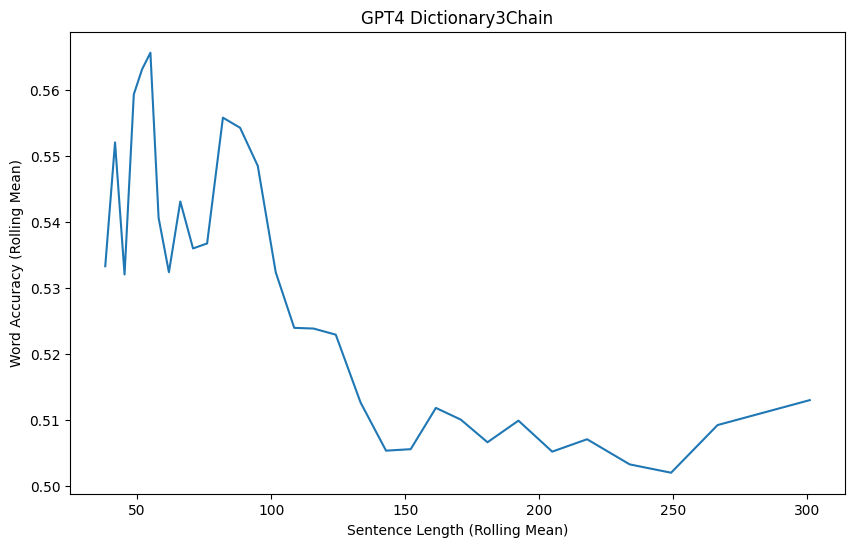

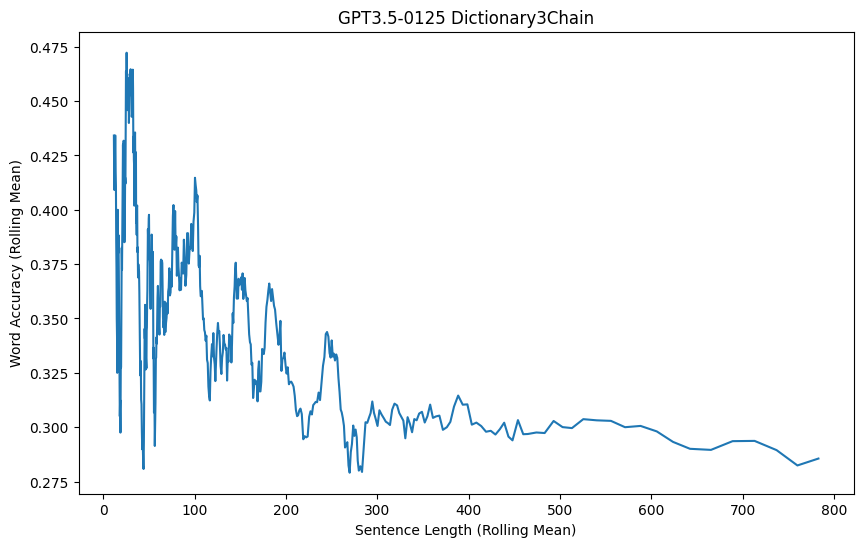

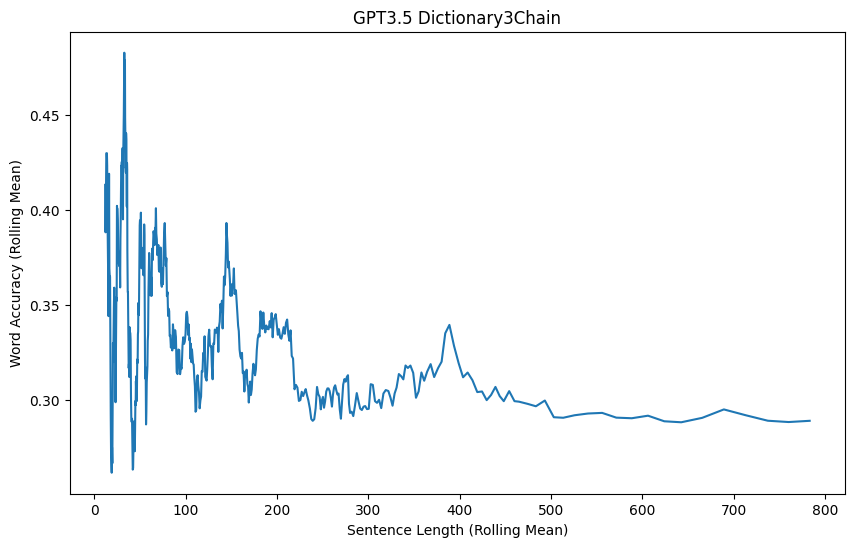

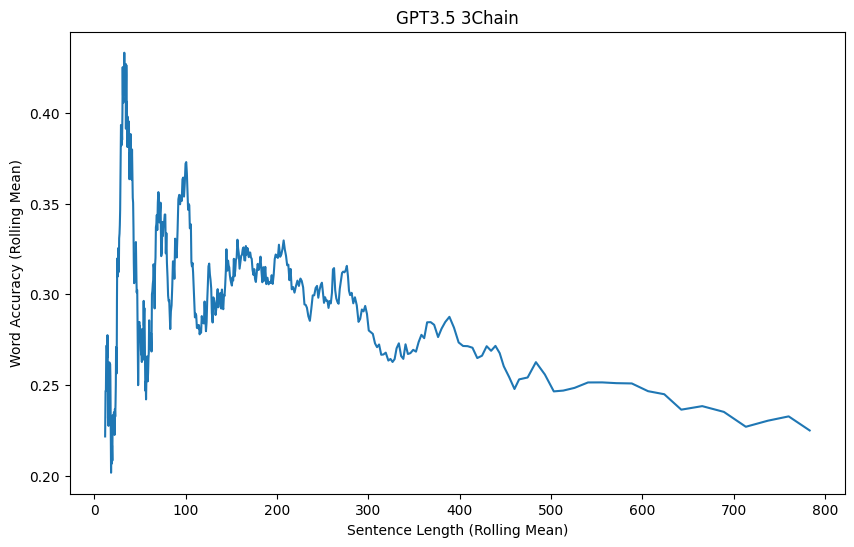

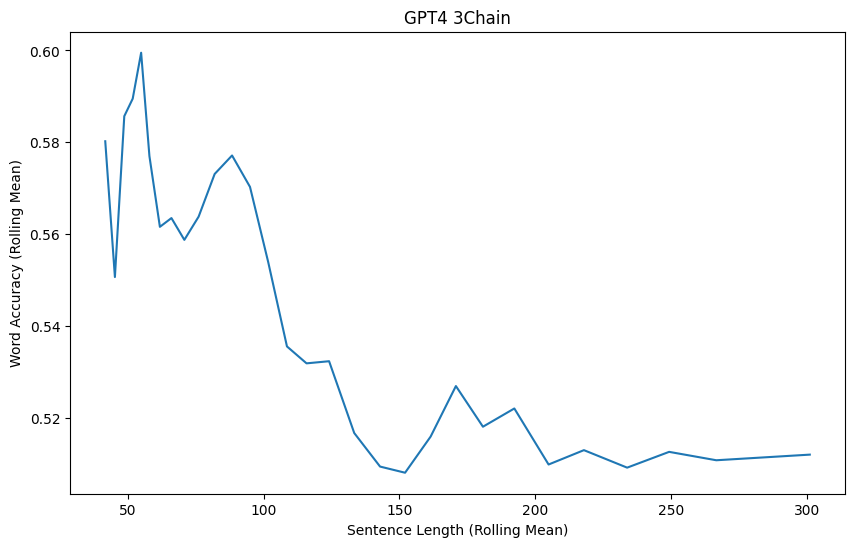

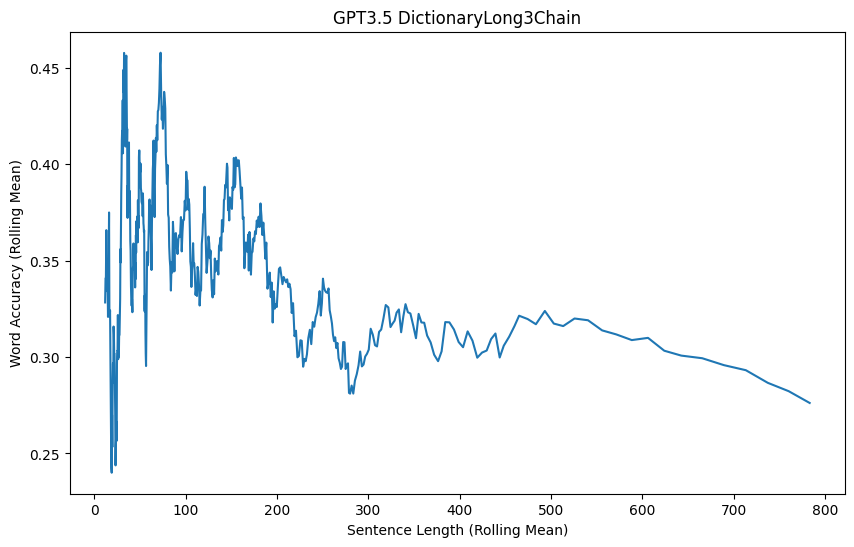

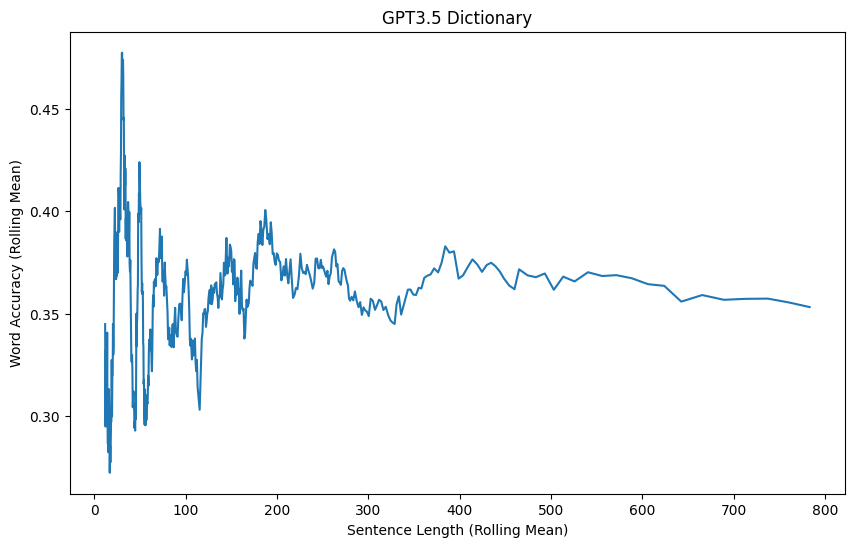

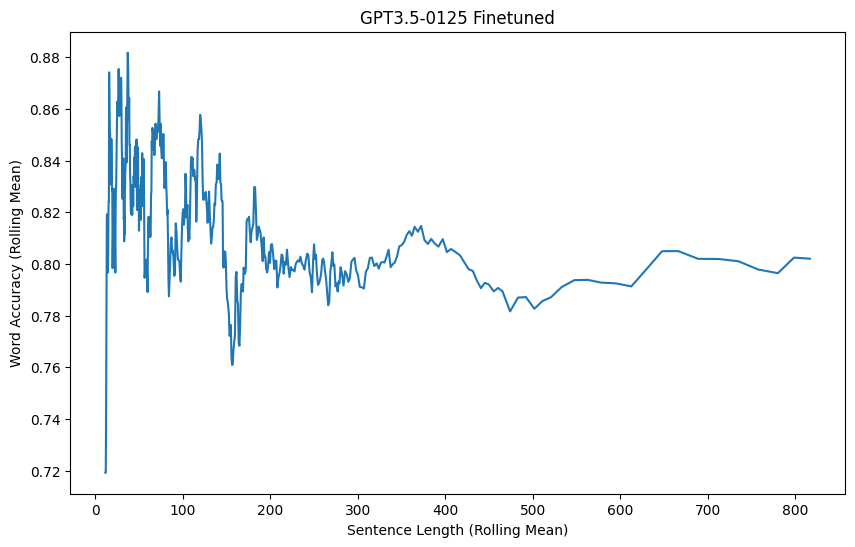

Skipping GPT3.5 DictionaryFinetunedDataset as it has no columns.


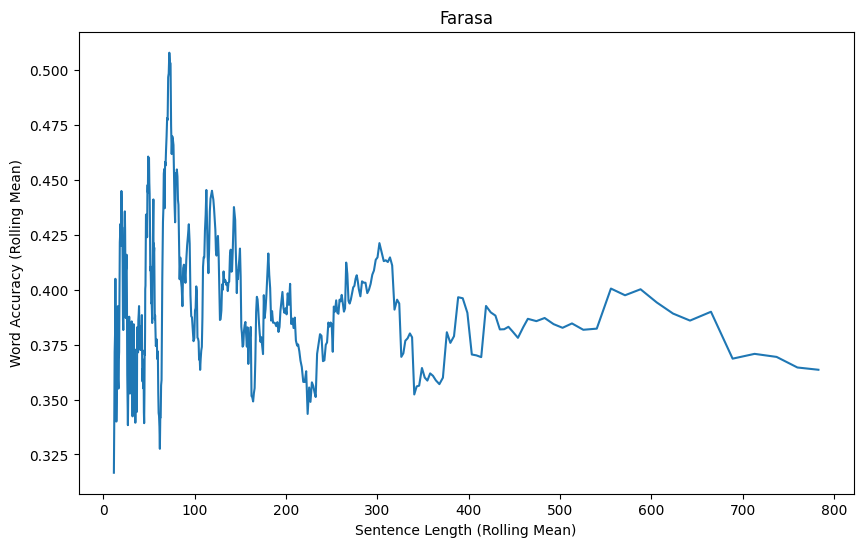

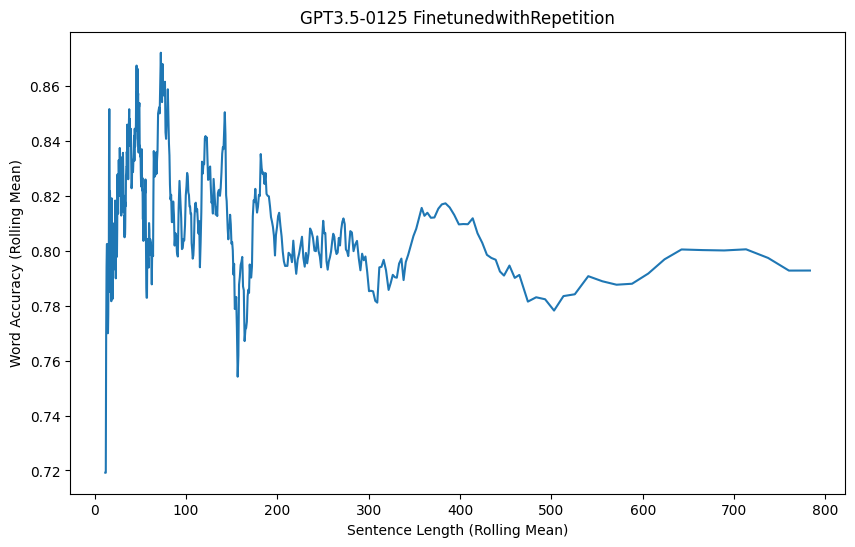

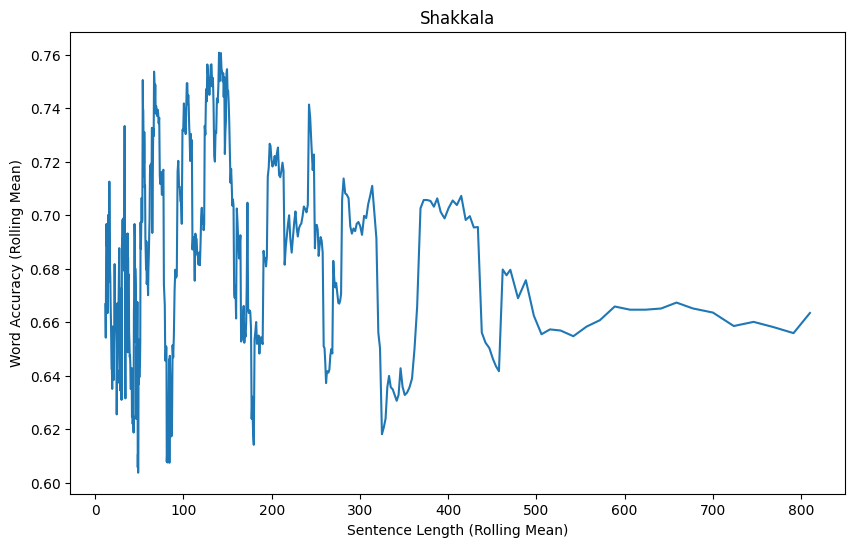

In [ ]:
makeplot(dfs,"Word Accuracy",20)

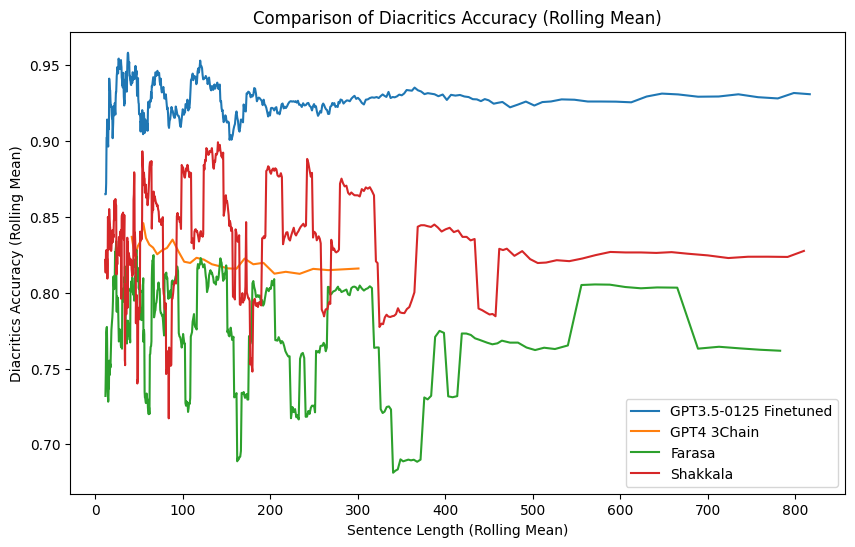

In [ ]:
import matplotlib.pyplot as plt

def comparePlot(dataframes, test, Filenames, window_size=10, text_independent = "Sentence Length", xlimit = (-1,-1), ylimit = (-1,-1)):
    """
    Plot rolling plots for selected DataFrames on the same plot.
    It plots the specified test metric against Sentence Length with a rolling window.

    Parameters:
        dataframes (dict): A dictionary of DataFrames keyed by filenames.
        test (str): The column name of the test metric to plot.
        Filenames (list): A list of filenames to include in the plot.
        window_size (int, optional): The size of the rolling window. Defaults to 10.
    """
    # Initialize the figure outside the loop
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

    for file_name in Filenames:
        df = dataframes.get(file_name)
        if df is not None and df.columns.size > 0:
            # Ensure sorting by "Sentence Length"
            df_sorted = df.sort_values(text_independent)

            # Calculate rolling averages
            rolling_sentence_length = df_sorted[text_independent].rolling(window=window_size).mean()
            rolling_diacritics_accuracy = df_sorted[test].rolling(window=window_size).mean()

            # Plotting
            plt.plot(rolling_sentence_length, rolling_diacritics_accuracy, label=file_name)
        else:
            print(f"Skipping {file_name} as it is not found or has no columns.")

    # Finalize plot
    plt.title('Comparison of {} (Rolling Mean)'.format(test))
    plt.xlabel('{} (Rolling Mean)'.format(text_independent))
    plt.ylabel('{} (Rolling Mean)'.format(test))
    if xlimit != (-1,-1):
        plt.xlim(xlimit)
    if ylimit != (-1,-1):
        plt.ylim(ylimit)
    plt.legend()
    plt.show()

# Example usage:
comparePlot(dfs, "Diacritics Accuracy", ["GPT3.5-0125 Finetuned", "GPT4 3Chain", "Farasa","Shakkala"], 20)


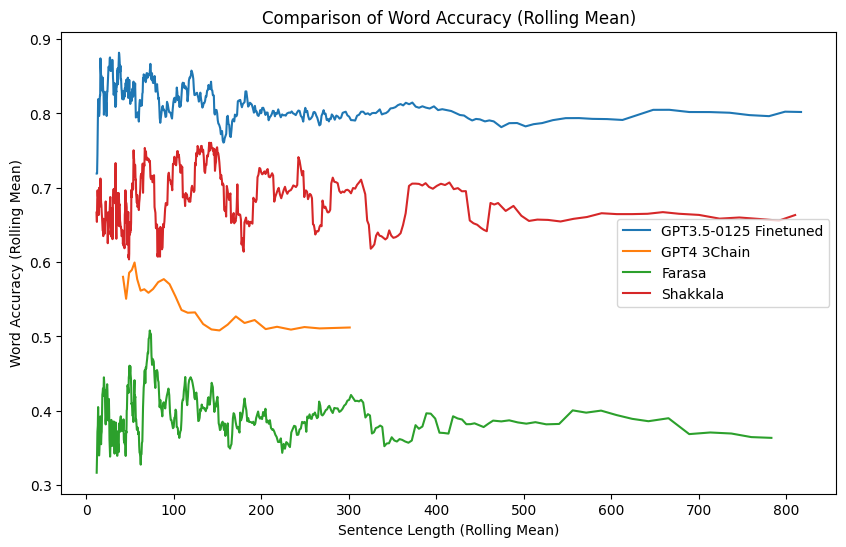

In [ ]:
comparePlot(dfs, "Word Accuracy", ["GPT3.5-0125 Finetuned", "GPT4 3Chain", "Farasa","Shakkala"], 20)


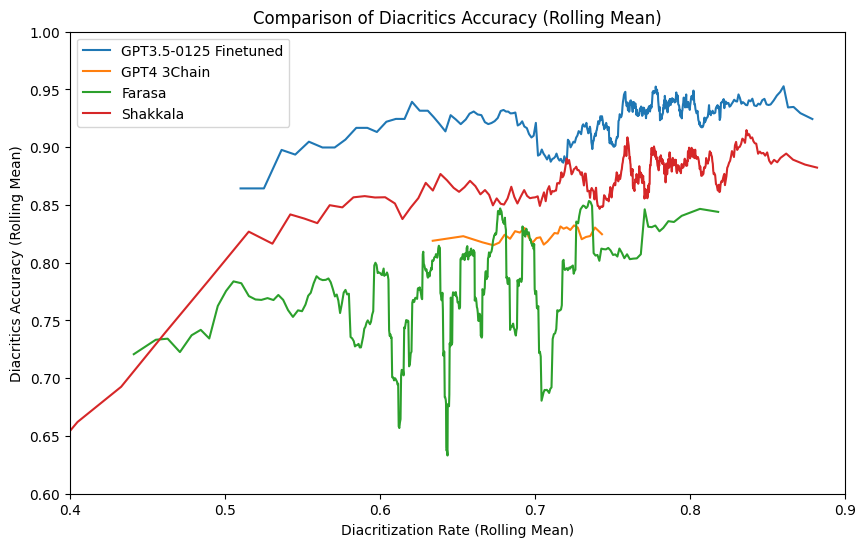

In [ ]:
comparePlot(dfs, "Diacritics Accuracy", ["GPT3.5-0125 Finetuned", "GPT4 3Chain", "Farasa","Shakkala"], 20, "Diacritization Rate", xlimit = (0.4,0.9), ylimit = (0.6,1))


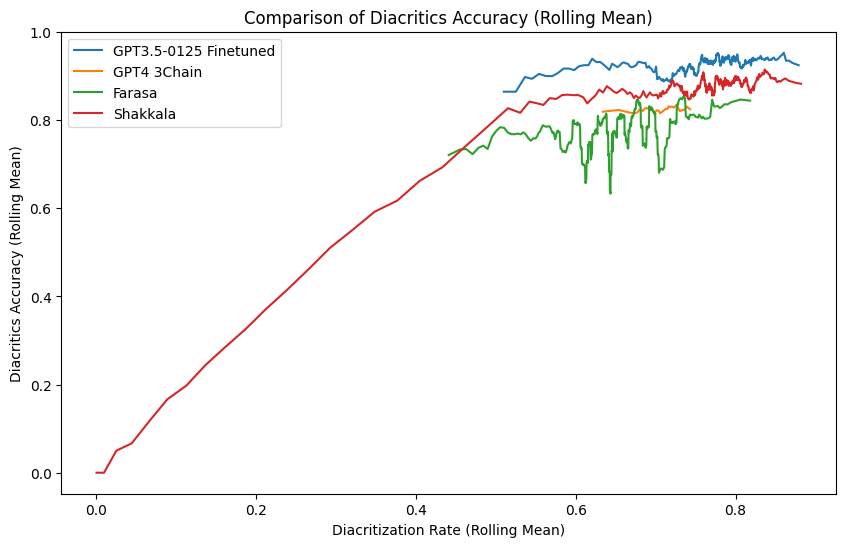

In [ ]:
comparePlot(dfs, "Diacritics Accuracy", ["GPT3.5-0125 Finetuned", "GPT4 3Chain", "Farasa","Shakkala"], 20, "Diacritization Rate")


In [ ]:
y = "ذَهًبٌ احمد اٍلّىُ"
len(y.split())
len(remove_extra_spaces(remove_non_diacritics(y)).split())
word_diacritization_rate_eq(y, y)

0.6666666666666667